In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
t_data = pd.read_csv('Titanic Survival Prediction project.csv')
t_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [3]:
t_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
t_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [5]:
t_data.shape

(418, 12)

In [6]:
t_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [7]:
t_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [8]:
# to handle missing values in the cabin column we will drop it as they are numerous
t_data.drop(columns = 'Cabin', axis = 1, inplace = True)

In [9]:
# to handle missing values in the age and fare columns we will replace them with the mean age and fare
Age = t_data['Age'].mean()

In [10]:
t_data['Age'].fillna(Age, inplace = True)

In [11]:
Fare = t_data['Fare'].mean()

In [12]:
t_data['Fare'].fillna(Fare, inplace = True)

In [13]:
t_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          418 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         418 non-null    float64
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 36.1+ KB


In [14]:
# Our data is now Consistent

t_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.50000,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00000,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.00000,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.00000,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00000,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,30.27259,0,0,A.5. 3236,8.0500,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.00000,0,0,PC 17758,108.9000,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,0,3,"Ware, Mr. Frederick",male,30.27259,0,0,359309,8.0500,S


In [15]:
sns.set()

<Axes: xlabel='Sex', ylabel='count'>

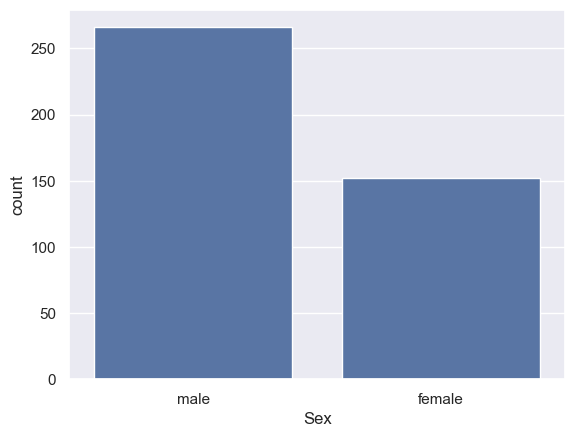

In [16]:
sns.countplot(x = "Sex", data = t_data)

In [17]:
t_data['Survived'].value_counts()

Survived
0    266
1    152
Name: count, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

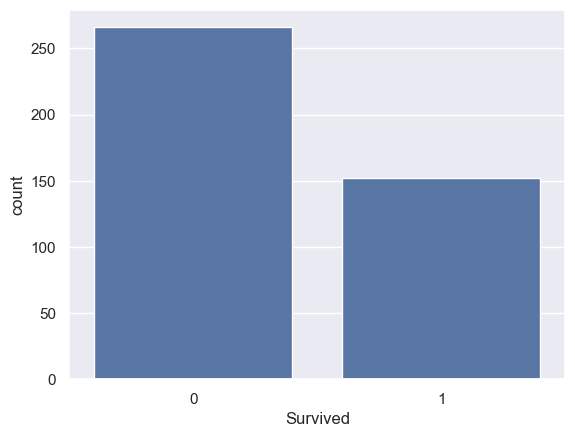

In [18]:
sns.countplot(x = 'Survived', data = t_data)

<Axes: xlabel='Sex', ylabel='count'>

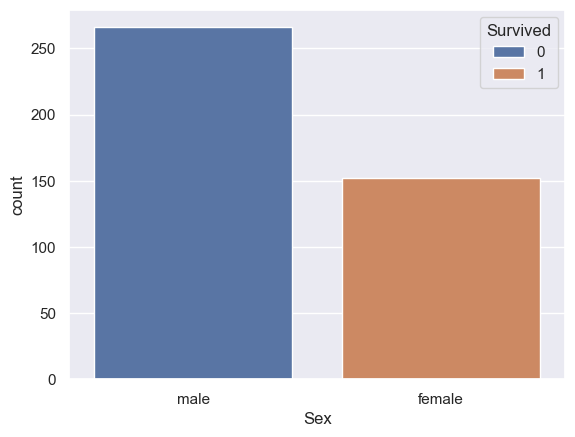

In [19]:
sns.countplot(x = 'Sex', hue = 'Survived', data = t_data)

<Axes: xlabel='Pclass', ylabel='count'>

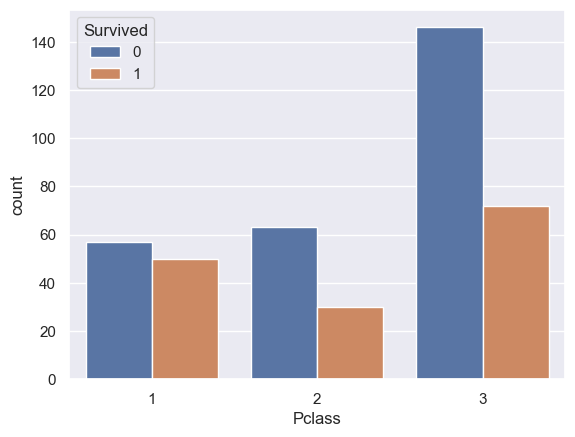

In [20]:
sns.countplot(x = 'Pclass', hue = 'Survived', data = t_data)

In [21]:
t_data[['Survived', 'Sex', 'Pclass']]

,Survived,Sex,Pclass
0,0,male,3
1,1,female,3
2,0,male,2
3,0,male,3
4,1,female,3
...,...,...,...
413,0,male,3
414,1,female,1
415,0,male,3
416,0,male,3


In [22]:
t_data.replace({'Sex':{'male':0, 'female':1}, 'Embarked':{'S':0, 'C':1, 'Q':2}}, inplace = True)

In [23]:
t_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",0,34.50000,0,0,330911,7.8292,2
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.00000,1,0,363272,7.0000,0
2,894,0,2,"Myles, Mr. Thomas Francis",0,62.00000,0,0,240276,9.6875,2
3,895,0,3,"Wirz, Mr. Albert",0,27.00000,0,0,315154,8.6625,0
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.00000,1,1,3101298,12.2875,0
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",0,30.27259,0,0,A.5. 3236,8.0500,0
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",1,39.00000,0,0,PC 17758,108.9000,1
415,1307,0,3,"Saether, Mr. Simon Sivertsen",0,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,0
416,1308,0,3,"Ware, Mr. Frederick",0,30.27259,0,0,359309,8.0500,0


In [24]:
# Drop the column which are irrelevant for the survival prediction, such as passengerId, Name and ticket
t_data.drop(columns = {'PassengerId', 'Name', 'Ticket'},axis = 1, inplace = True)

In [25]:
t_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,34.50000,0,0,7.8292,2
1,1,3,1,47.00000,1,0,7.0000,0
2,0,2,0,62.00000,0,0,9.6875,2
3,0,3,0,27.00000,0,0,8.6625,0
4,1,3,1,22.00000,1,1,12.2875,0
...,...,...,...,...,...,...,...,...
413,0,3,0,30.27259,0,0,8.0500,0
414,1,1,1,39.00000,0,0,108.9000,1
415,0,3,0,38.50000,0,0,7.2500,0
416,0,3,0,30.27259,0,0,8.0500,0


In [26]:
X = t_data.drop(columns = 'Survived', axis = 1)
Y = t_data['Survived']

In [27]:
print(X)
print(Y)

     Pclass  Sex       Age  SibSp  Parch      Fare  Embarked
0         3    0  34.50000      0      0    7.8292         2
1         3    1  47.00000      1      0    7.0000         0
2         2    0  62.00000      0      0    9.6875         2
3         3    0  27.00000      0      0    8.6625         0
4         3    1  22.00000      1      1   12.2875         0
..      ...  ...       ...    ...    ...       ...       ...
413       3    0  30.27259      0      0    8.0500         0
414       1    1  39.00000      0      0  108.9000         1
415       3    0  38.50000      0      0    7.2500         0
416       3    0  30.27259      0      0    8.0500         0
417       3    0  30.27259      1      1   22.3583         1

[418 rows x 7 columns]
0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64


In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2)

In [29]:
X_train.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [30]:
model = LogisticRegression()

In [31]:
model = LogisticRegression()

In [32]:
model.fit(X_train, Y_train)

LogisticRegression()

In [33]:
X_train_prediction = model.predict(X_train)

In [34]:
print(X_train_prediction)

[0 1 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1
 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 1 1 0 0 1 1 1 0 0 1
 0 0 1 1 1 0 0 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 1 1 0 1 1
 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0
 0 1 1 0 0 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 0
 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 1 0
 0 1 1 1 0 1 1 0 0 1 1 1 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1 1 0 1 0 0 0
 0 0 0 1 1 0 1 0 0 1 0 1 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0
 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 1 0 0 1 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0
 1]


In [35]:
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of training data : ', training_data_accuracy)

Accuracy score of training data :  1.0


In [36]:
X_test_prediction = model.predict(X_test)

In [37]:
print(X_test_prediction)

[0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0
 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0
 0 0 1 1 0 0 1 0 1 1]


In [38]:
testing_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [39]:
print('Accuracy score of test data is : ', testing_data_accuracy)

Accuracy score of test data is :  1.0


In [40]:
test_data_precision = precision_score(Y_test, X_test_prediction)

In [41]:
print('test data precion is :', test_data_precision)

test data precion is : 1.0


In [42]:
test_data_recall = recall_score(Y_train, X_train_prediction)  # recall score 

In [43]:
test_data_recall = recall_score(Y_train, X_train_prediction)  # precision score

In [44]:
print('test data precion is:', test_data_precision)

test data precion is: 1.0


In [45]:
test_data_recall = recall_score(Y_train, X_train_prediction)

In [46]:
print('test data recall is :', test_data_recall)

test data recall is : 1.0


In [47]:
from sklearn import metrics

In [48]:
score = model.score(X_test, Y_test)
print(score)

1.0


In [49]:
cm = metrics.confusion_matrix(Y_train, X_train_prediction)
print(cm)

[[210   0]
 [  0 124]]


Text(0.5, 1.0, "('Accuracy Score:', 1.0)")

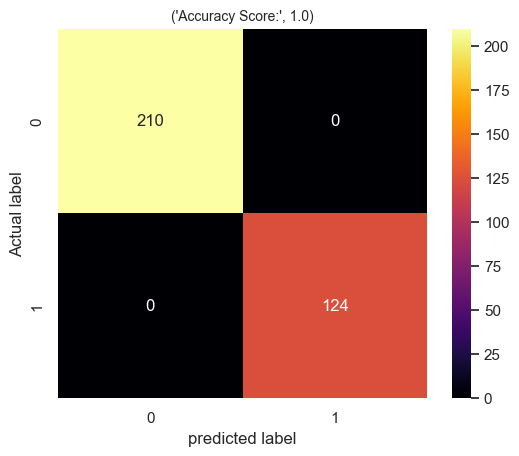

In [50]:
sns.heatmap(cm, annot = True, fmt = 'd', square = True, cmap= "inferno")
plt.ylabel('Actual label')
plt.xlabel('predicted label')
title = ('Accuracy Score:' , score)
plt.title(title, size = 10)

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
model_2 = RandomForestClassifier(n_estimators = 100)

In [53]:
model_2.fit(X_train, Y_train)

RandomForestClassifier()

In [54]:
X_test_pred = model_2.predict(X_test)

In [55]:
model_2.score(X_train, Y_train)
acc_score = round(model_2.score(X_test,Y_test) * 100, 2)
model_2_acc = accuracy_score(X_test_pred, Y_test)

In [56]:
model_2_acc

1.0

In [57]:
acc_score

100.0

In [58]:
precision = precision_score(X_test_pred, Y_test)
recall = recall_score(X_test_pred, Y_test)

In [59]:
print(precision)
print(recall)

1.0
1.0


In [60]:
classification_report(X_test_pred, Y_test)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        56\n           1       1.00      1.00      1.00        28\n\n    accuracy                           1.00        84\n   macro avg       1.00      1.00      1.00        84\nweighted avg       1.00      1.00      1.00        84\n'

In [61]:
from sklearn.neighbors import KNeighborsClassifier

In [62]:
model_3 = KNeighborsClassifier(n_neighbors = 3)

In [63]:
model_3.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

In [64]:
X_test_pred = model_3.predict(X_test)

In [65]:
model_3_acc = accuracy_score(X_test_pred, Y_test, normalize = True)

In [66]:
model_3_score = round(model_3.score(X_train, Y_train) * 100, 2)

In [67]:
model_3_precision = precision_score(X_test_pred, Y_test)
model_3_recall = recall_score(X_test_pred, Y_test)

In [68]:
model_3_score

84.43

In [69]:
model_3_acc

0.7738095238095238

In [70]:
print(model_3_precision)
print(model_3_recall)

0.6071428571428571
0.68


In [71]:
classification_report(X_test_pred, Y_test)

'              precision    recall  f1-score   support\n\n           0       0.86      0.81      0.83        59\n           1       0.61      0.68      0.64        25\n\n    accuracy                           0.77        84\n   macro avg       0.73      0.75      0.74        84\nweighted avg       0.78      0.77      0.78        84\n'

In [72]:
print(X)
print(Y)

     Pclass  Sex       Age  SibSp  Parch      Fare  Embarked
0         3    0  34.50000      0      0    7.8292         2
1         3    1  47.00000      1      0    7.0000         0
2         2    0  62.00000      0      0    9.6875         2
3         3    0  27.00000      0      0    8.6625         0
4         3    1  22.00000      1      1   12.2875         0
..      ...  ...       ...    ...    ...       ...       ...
413       3    0  30.27259      0      0    8.0500         0
414       1    1  39.00000      0      0  108.9000         1
415       3    0  38.50000      0      0    7.2500         0
416       3    0  30.27259      0      0    8.0500         0
417       3    0  30.27259      1      1   22.3583         1

[418 rows x 7 columns]
0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64


In [73]:
p1 = model.predict([[3, 0, 34.5, 0, 0, 7.8292, 2]])
p2 = model_2.predict([[3, 0, 34.5, 0, 0, 7.8292, 2]])
p3 = model_3.predict([[3, 0, 34.5, 0, 0, 7.8292, 2]])

print(p1)
print(p2)
print(p3)

[0]
[0]
[0]


In [74]:
p1 = model.predict([[2, 0, 38.5, 0, 0, 7.2500, 0]])
p2 = model_2.predict([[2, 0, 38.5, 0, 0, 7.2500, 0]])
p3 = model_3.predict([[2, 0, 38.5, 0, 0, 7.2500, 0]])

print(p1)
print(p2)
print(p3)

[0]
[0]
[0]
